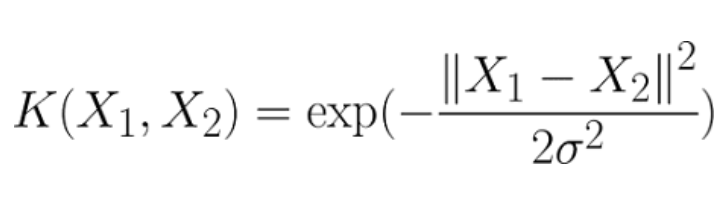

Suport Vector Machines SVM ::

  Decision boundary - The line separating the classes.
    SVM Maximizes the margin from support vectors to decision boundary so as to increase the model performance & reduce the errors.

  Here the datapoints are linearly separable ie, you are able to separate the classes using a line.

  Few datapoints are not linearly separable ie, the decision boundary is not linear but circular.

  So to handle such non linearly separable datapoints, we will transform the datapoints from non-linear to linearly separable space using Kernels.

  **Kernels** :: These are the functions that are applied on the data to make it into linearly separable space.

  It transforms low dimensional input into high dimensional data by generating more features from few features.

  Kernel Funstions are ::

  1. Linear Kernel - k(x,y) = sum(x*y)
      2. Polynomial Kernel - k(x,y) = sum(x*y)**d where d=degree of polynomial
      3. RBF Kernel :: Radial basis funstion.
    
        sigma value is between 0-1 & typically its 0.1.
Advantages ::
      1. SVM gives good accuracy and fast prediction.
      2. Less memory
      
Disadvantages ::
      1. Not suitable for large datasets.
      2. time for training.
      3. Sensitive to the kernel you have co=hosen.

In [ ]:
# sklearen module contains functions for all the phases of moduling such as pre-processing, ML algo...  & also standard datasets called as inbuilt datasets.
from sklearn.datasets import load_breast_cancer

In [ ]:
dataset = load_breast_cancer()
dataset.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [ ]:
print(dataset.feature_names)
print(len(dataset.feature_names))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
30


In [ ]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
x = dataset.data

In [ ]:
print(type(x))

<class 'numpy.ndarray'>


In [ ]:
x[:2]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02]])

In [ ]:
y = dataset.target

In [ ]:
print(y[:4])
print(y[-4:])
print(y[100:110])

[0 0 0 0]
[0 0 0 1]
[0 1 1 1 1 0 1 1 0 1]


In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=40)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(455, 30) (114, 30) (455,) (114,)


In [ ]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear')
model.fit(xtrain,ytrain)

SVC(kernel='linear')

In [ ]:
ypreds = model.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ypreds,ytest))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        41
           1       0.95      0.97      0.96        73

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



Now we'll  use Polynomial kernel

In [ ]:
model = SVC(kernel = 'poly', degree = 3)
model.fit(xtrain,ytrain)
ypreds = model.predict(xtest)
print(classification_report(ypreds,ytest))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        35
           1       0.96      0.91      0.94        79

    accuracy                           0.91       114
   macro avg       0.89      0.91      0.90       114
weighted avg       0.92      0.91      0.91       114



In [ ]:
for d in range(2,6):
  model = SVC(kernel = 'poly', degree = 3)
  model.fit(xtrain,ytrain)
  ypreds = model.predict(xtest)
  print(classification_report(ypreds,ytest))


              precision    recall  f1-score   support

           0       0.82      0.91      0.86        35
           1       0.96      0.91      0.94        79

    accuracy                           0.91       114
   macro avg       0.89      0.91      0.90       114
weighted avg       0.92      0.91      0.91       114

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        35
           1       0.96      0.91      0.94        79

    accuracy                           0.91       114
   macro avg       0.89      0.91      0.90       114
weighted avg       0.92      0.91      0.91       114

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        35
           1       0.96      0.91      0.94        79

    accuracy                           0.91       114
   macro avg       0.89      0.91      0.90       114
weighted avg       0.92      0.91      0.91       114

              preci

RBF Kernel

In [ ]:
#RBF Kernel implementation
model = SVC()
model.fit(xtrain,ytrain)
ypreds = model.predict(xtest)
print(classification_report(ypreds,ytest))


              precision    recall  f1-score   support

           0       0.87      0.92      0.89        37
           1       0.96      0.94      0.95        77

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114

